### ENERGY ANALYSIS

In [1]:
# Import the standard tools for pythonic data analysis. 
import csv
import math
import random
import numpy as np 
import pandas as pd 

# Let's read the data in as a "data frame" (df), equivalent to our D = (X,y) data matrix
df = pd.read_csv('/Users/liangzhengxin/Library/Mobile Documents/com~apple~CloudDocs/Grand Unified Theory/Y3S1 NUS 2022/CS3244 Machine Learning/Project/Datasets/Energy/train/raw_train_data.csv',sep=',',low_memory=False) # Separate on semicolons

In [15]:
# Mean of Differences of each Counter Coefficient
diff_counter_coefficient = df.groupby(["client_id"])["counter_coefficient"].diff()



In [17]:
np.mean(diff_counter_coefficient).to_list()

AttributeError: 'float' object has no attribute 'to_list'

In [3]:
diff_counter_coefficient

0          NaN
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
4476744    NaN
4476745    0.0
4476746    NaN
4476747    0.0
4476748    0.0
Name: counter_coefficient, Length: 4476749, dtype: float64

In [ ]:
np.mean(diff_counter_coefficient).tolist()

In [24]:
df.columns

Index(['Unnamed: 0', 'disrict', 'client_id', 'client_catg', 'region',
       'creation_date', 'target', 'invoice_date', 'tarif_type',
       'counter_number', 'counter_statue', 'counter_code', 'reading_remarque',
       'counter_coefficient', 'consommation_level_1', 'consommation_level_2',
       'consommation_level_3', 'consommation_level_4', 'old_index',
       'new_index', 'months_number', 'counter_type'],
      dtype='object')

In [53]:
df['invoice_date'] = pd.to_datetime(df['invoice_date'])
df['creation_date'] = pd.to_datetime(df['creation_date'])

In [38]:
df.head()

,Unnamed: 0,disrict,client_id,client_catg,region,creation_date,target,invoice_date,tarif_type,counter_number,...,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,0,60,train_Client_0,11,101,31/12/1994,0.0,2014-03-24,11,1335667,...,8,1,82,0,0,0,14302,14384,4,ELEC
1,0,60,train_Client_0,11,101,31/12/1994,0.0,2013-03-29,11,1335667,...,6,1,1200,184,0,0,12294,13678,4,ELEC
2,0,60,train_Client_0,11,101,31/12/1994,0.0,2015-03-23,11,1335667,...,8,1,123,0,0,0,14624,14747,4,ELEC
3,0,60,train_Client_0,11,101,31/12/1994,0.0,2015-07-13,11,1335667,...,8,1,102,0,0,0,14747,14849,4,ELEC
4,0,60,train_Client_0,11,101,31/12/1994,0.0,2016-11-17,11,1335667,...,9,1,572,0,0,0,15066,15638,12,ELEC


In [96]:
((df.groupby(["client_id"])['invoice_date'].max() - df.groupby(["client_id"])['invoice_date'].min())/np.timedelta64(1, 'M'))

client_id
train_Client_0        161.021787
train_Client_1        161.416046
train_Client_10       161.678885
train_Client_100       87.525411
train_Client_1000      52.074991
                         ...    
train_Client_99995    167.527054
train_Client_99996     75.796218
train_Client_99997     92.683628
train_Client_99998      4.008296
train_Client_99999      8.016592
Name: invoice_date, Length: 135493, dtype: float64

In [95]:
((df.groupby(["client_id"])['invoice_date'].max() - df.groupby(["client_id"])['invoice_date'].min())/np.timedelta64(1, 'M')).to_list()

[161.02178689500812,
 161.41604550401445,
 161.67888457668536,
 87.52541119940861,
 52.074991272921416,
 151.98669377194602,
 79.80451343970103,
 163.25591901271073,
 3.942586090063451,
 29.40512125505657,
 39.984393930060165,
 171.3382204973408,
 147.12417092753444,
 119.59177806525801,
 39.88582927780858,
 152.41380726503624,
 168.51270046612868,
 8.246575905049385,
 85.84981211113164,
 140.19179038583954,
 159.93757572024066,
 10.152159181913387,
 36.107517608164436,
 163.48590320129776,
 88.01823446066655,
 0.0,
 157.8348631388735,
 160.20041479291154,
 163.8144520421364,
 12.419146183699871,
 172.88240004928232,
 9.856465225158628,
 172.22530236760508,
 166.6728269574324,
 10.020739645577939,
 165.81859997125198,
 167.3627795231935,
 13.700486662970492,
 31.40926918417216,
 0.0,
 147.48557465245693,
 69.1595309965297,
 0.0,
 163.48590320129776,
 40.181523234563336,
 83.48426045709357,
 108.02685886773855,
 155.43645660075157,
 7.85231729604304,
 7.786607527875316,
 107.86258444731

In [61]:
((df.groupby(["client_id"])['invoice_date'].max() - df.groupby(["client_id"])['creation_date'].min())/np.timedelta64(1, 'M')).min()

-10.940676399926076

In [34]:
df.dtypes

Unnamed: 0                int64
client_id                object
target                  float64
invoice_date             object
tarif_type                int64
counter_number            int64
counter_statue           object
counter_code              int64
reading_remarque          int64
counter_coefficient       int64
consommation_level_1      int64
consommation_level_2      int64
consommation_level_3      int64
consommation_level_4      int64
old_index                 int64
new_index                 int64
months_number             int64
counter_type             object
dtype: object

In [6]:
df.loc[df['counter_type'] == 'ELEC']['tarif_type'].unique()

array([11, 15, 10, 12, 14, 13, 29,  9,  8, 21, 27, 18, 24])

In [7]:
df.loc[df['counter_type'] == 'GAZ']['tarif_type'].unique()

array([40, 45, 30, 42])

In [56]:
df['counter_type'].unique()

array(['ELEC', 'GAZ'], dtype=object)

In [71]:
df.groupby('client_id')['tarif_type'].nunique().value_counts()

1    70837
2    60466
3     3701
4      424
5       56
6        9
Name: tarif_type, dtype: int64

In [13]:
df.groupby('client_id')['counter_type'].unique()

client_id
train_Client_0             [ELEC]
train_Client_1             [ELEC]
train_Client_10            [ELEC]
train_Client_100           [ELEC]
train_Client_1000          [ELEC]
                         ...     
train_Client_99995    [ELEC, GAZ]
train_Client_99996    [ELEC, GAZ]
train_Client_99997    [ELEC, GAZ]
train_Client_99998         [ELEC]
train_Client_99999         [ELEC]
Name: counter_type, Length: 135493, dtype: object

In [83]:
# Import the standard tools for pythonic data analysis. 
import csv
import math
import random
import numpy as np 
import pandas as pd 

# Let's read the data in as a "data frame" (df), equivalent to our D = (X,y) data matrix
df2 = pd.read_csv('/Users/liangzhengxin/Library/Mobile Documents/com~apple~CloudDocs/Grand Unified Theory/Y3S1 NUS 2022/CS3244 Machine Learning/Project/Datasets/Energy/train/client_train.csv',sep=',',low_memory=False) # Separate on semicolons

In [18]:
df2.loc[df2['client_id']=='train_Client_0']['target']

0    0.0
Name: target, dtype: float64

In [40]:
df['target'] = df.apply(lambda row: int(row['target']),axis=1)

In [44]:
dfF = df.loc[df['target']==1].copy()
dfF

,Unnamed: 0,client_id,target,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
1384,41,train_Client_100032,1,2017-02-24,11,393848,0,203,9,1,781,0,0,0,3844,4625,8,ELEC
1385,41,train_Client_100032,1,2016-06-21,11,393848,0,203,9,1,382,0,0,0,3462,3844,4,ELEC
1386,41,train_Client_100032,1,2018-10-26,11,393848,0,203,9,1,373,0,0,0,6032,6405,4,ELEC
1387,41,train_Client_100032,1,2018-06-21,11,393848,0,203,9,1,328,0,0,0,5704,6032,4,ELEC
1388,41,train_Client_100032,1,2018-02-23,11,393848,0,203,9,1,703,0,0,0,5001,5704,4,ELEC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4476230,135474,train_Client_99982,1,2010-11-22,10,1379797,0,202,8,1,200,192,0,0,17559,17951,4,ELEC
4476231,135474,train_Client_99982,1,2011-07-19,10,1379797,0,202,6,1,200,98,0,0,18271,18569,4,ELEC
4476232,135474,train_Client_99982,1,2012-03-19,10,1379797,0,202,8,1,187,0,0,0,18933,19120,4,ELEC
4476233,135474,train_Client_99982,1,2013-03-21,10,1379797,0,202,8,1,95,0,0,0,19582,19677,4,ELEC


<AxesSubplot:title={'center':'Distribution of classes'}>

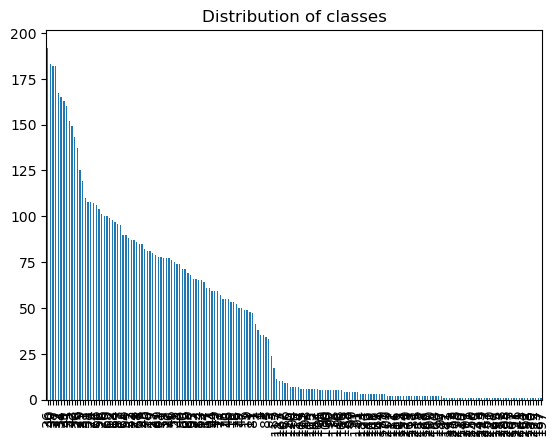

In [61]:
df
dfF.groupby('client_id')['invoice_date'].count().value_counts().plot(kind = 'bar', title = 'count of Number of Months of service for client')

In [16]:
df.loc[df['client_id']=='train_Client_0']['counter_code'].value_counts()

203    29
207     6
Name: counter_code, dtype: int64

In [10]:
df['counter_statue'].value_counts()

0         4379008
1           74036
5           20639
4            2729
3             258
2              32
46             14
A              13
618            12
769             6
269375          1
420             1
Name: counter_statue, dtype: int64

In [12]:
df.loc[df['target']==1]['counter_statue'].value_counts()

0    345295
1      5402
5      2159
4       235
3        19
2         2
Name: counter_statue, dtype: int64

In [20]:
df['reading_remarque'].value_counts()

6      2230939
9      1416992
8       828123
7          661
203         15
413         12
207          6
5            1
Name: reading_remarque, dtype: int64

In [64]:
df['counter_code'].value_counts()

203    1516836
5      1352035
207     555628
413     378917
202     343251
420      98273
410      69080
433      34447
10       27744
442      17050
25       14934
407      13768
204      12427
453       8290
201       7672
467       7302
506       3389
483       2830
214       2643
40        2482
532       1982
565       1082
403       1070
450       1059
600        807
210        789
102        313
227        178
65          74
101         74
16          73
310         51
307         50
305         44
222         42
0           33
317         16
303          5
333          4
367          3
325          1
1            1
Name: counter_code, dtype: int64

In [69]:
df.loc[df['target']== 1]['reading_remarque'].value_counts()

6    171938
9    113404
8     67769
7         1
Name: reading_remarque, dtype: int64

In [39]:
A = df.groupby('client_id')['invoice_date'].max().to_dict()

In [37]:
df.groupby('client_id')['invoice_date'].max()

client_id
train_Client_0        2019-03-19
train_Client_1        2019-04-02
train_Client_10       2019-05-02
train_Client_100      2012-09-25
train_Client_1000     2019-06-17
                         ...    
train_Client_99995    2019-06-26
train_Client_99996    2019-06-18
train_Client_99997    2019-11-06
train_Client_99998    2005-12-19
train_Client_99999    1996-09-25
Name: invoice_date, Length: 135493, dtype: object

In [26]:
df2 = pd.read_csv('/Users/liangzhengxin/Library/Mobile Documents/com~apple~CloudDocs/Grand Unified Theory/Y3S1 NUS 2022/CS3244 Machine Learning/Project/Datasets/Energy/train/client_train.csv',sep=',',low_memory=False) # Separate on semicolons

In [41]:
df2['test'] = df2.apply(lambda row: A[row['client_id']],axis=1)

In [48]:
df2['test'] = pd.to_datetime(df2['test'])
df2['creation_date'] = pd.to_datetime(df2['creation_date'])

In [50]:
df2['days'] = df2['test'] - df2['creation_date']

In [49]:
df2.dtypes

disrict                   int64
client_id                object
client_catg               int64
region                    int64
creation_date    datetime64[ns]
target                  float64
test             datetime64[ns]
dtype: object

In [58]:
print('Fraud',df2.loc[df2['target'] == 1]['days'].mean())
print('No Fraud',df2.loc[df2['target'] == 0]['days'].mean())

Fraud 6869 days 16:16:44.916732800
No Fraud 5139 days 01:53:49.494946304


In [111]:
df2.loc[df2['target'] == 1]['days'].min()

Timedelta('-299 days +00:00:00')

In [72]:
df.head()

,Unnamed: 0,client_id,target,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type,total_consumption
0,0,train_Client_0,0.0,2014-03-24,11,1335667,0,203,8,1,82,0,0,0,14302,14384,4,ELEC,82
1,0,train_Client_0,0.0,2013-03-29,11,1335667,0,203,6,1,1200,184,0,0,12294,13678,4,ELEC,1384
2,0,train_Client_0,0.0,2015-03-23,11,1335667,0,203,8,1,123,0,0,0,14624,14747,4,ELEC,123
3,0,train_Client_0,0.0,2015-07-13,11,1335667,0,207,8,1,102,0,0,0,14747,14849,4,ELEC,102
4,0,train_Client_0,0.0,2016-11-17,11,1335667,0,207,9,1,572,0,0,0,15066,15638,12,ELEC,572


In [71]:
df['total_consumption'] = df['consommation_level_1'] + df['consommation_level_2'] + df['consommation_level_3'] + df['consommation_level_4']

In [107]:
df.loc[((df['new_index']-df['old_index']-df['total_consumption']) != 0) & df['target'] == 1]

,Unnamed: 0,client_id,target,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type,total_consumption
3004,97,train_Client_100083,1.0,2012-02-16,40,6788434,0,5,8,1,204,0,0,0,1469,1469,12,GAZ,204
7571,245,train_Client_100216,1.0,2012-02-27,11,1170937,0,203,8,1,336,0,0,0,3775,4019,8,ELEC,336
16452,492,train_Client_100439,1.0,2009-02-09,40,6889019,0,5,6,1,607,0,0,0,232,232,8,GAZ,607
21331,654,train_Client_100585,1.0,2008-09-24,11,20242,0,207,9,1,313,0,0,0,72,72,4,ELEC,313
27404,848,train_Client_10076,1.0,2016-06-05,11,700739,0,420,9,1,187,0,0,0,4068,5031,4,ELEC,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4466152,135180,train_Client_99717,1.0,2016-04-21,11,3742703,0,413,8,1,102,0,0,0,17100,17872,4,ELEC,102
4466155,135180,train_Client_99717,1.0,2018-04-20,11,3742703,0,413,9,1,305,0,0,0,22632,23338,4,ELEC,305
4471276,135330,train_Client_99852,1.0,2008-12-23,11,1213790,1,203,6,1,600,629,0,0,12941,12941,2,ELEC,1229
4471492,135338,train_Client_9986,1.0,2011-05-25,40,39387,0,5,6,1,2622,0,0,0,0,0,8,GAZ,2622


In [115]:
list(filter(lambda x: len(x) >1,df.groupby('client_id')['tarif_type'].unique().to_numpy()))

[array([40, 11]),
 array([11, 40]),
 array([40, 11]),
 array([11, 40]),
 array([40, 11]),
 array([11, 40]),
 array([11, 40]),
 array([11, 40]),
 array([11, 40]),
 array([11, 15, 40]),
 array([40, 11]),
 array([40, 11]),
 array([40, 11]),
 array([40, 11]),
 array([40, 11]),
 array([11, 40]),
 array([11, 40]),
 array([40, 11]),
 array([11, 40]),
 array([11, 15]),
 array([11, 40]),
 array([11, 40]),
 array([11, 40]),
 array([40, 11]),
 array([40, 11]),
 array([11, 40]),
 array([11, 40]),
 array([11, 40]),
 array([40, 11]),
 array([40, 11]),
 array([40, 11]),
 array([11, 40]),
 array([11, 40]),
 array([40, 10]),
 array([40, 11]),
 array([11, 40]),
 array([40, 11]),
 array([10, 40]),
 array([11, 40]),
 array([11, 40]),
 array([12, 10, 14, 13]),
 array([11, 40]),
 array([11, 40]),
 array([40, 11]),
 array([11, 40]),
 array([40, 11]),
 array([40, 11]),
 array([40, 11]),
 array([11, 40]),
 array([11, 40]),
 array([40, 11]),
 array([40, 11]),
 array([11, 45]),
 array([40, 11]),
 array([11, 40])

In [77]:
df.groupby('client_id')['client_catg'].unique()

client_id
train_Client_0        [11]
train_Client_1        [11]
train_Client_10       [11]
train_Client_100      [11]
train_Client_1000     [11]
                      ... 
train_Client_99995    [11]
train_Client_99996    [11]
train_Client_99997    [11]
train_Client_99998    [11]
train_Client_99999    [11]
Name: client_catg, Length: 135493, dtype: object

In [78]:
df['client_catg'].value_counts()

11    4304888
51     103932
12      67929
Name: client_catg, dtype: int64

In [82]:
df.groupby('client_id')['creation_date'].unique().dt.day()

AttributeError: Can only use .dt accessor with datetimelike values

In [84]:
df2['creation_date'] = pd.to_datetime(df2['creation_date'])


In [93]:
df2['creation_date'].dt.month

0         12
1          5
2          3
3         11
4         10
          ..
135488     7
135489    10
135490    11
135491    12
135492     2
Name: creation_date, Length: 135493, dtype: int64

In [91]:
df2['creation_date']

0        1994-12-31
1        2002-05-29
2        1986-03-13
3        1996-11-07
4        2014-10-14
            ...    
135488   2004-07-26
135489   2012-10-25
135490   2011-11-22
135491   1993-12-22
135492   1986-02-18
Name: creation_date, Length: 135493, dtype: datetime64[ns]

In [101]:
df['tarif_type'].value_counts()

11    2679872
40    1379755
10     276210
15      72422
45      17552
13      11656
14      11611
12      11345
29      10090
9        6039
21        104
8          43
30         35
24          9
18          4
42          1
27          1
Name: tarif_type, dtype: int64

In [2]:
df['reading_remarque'].value_counts()

6      2230939
9      1416992
8       828123
7          661
203         15
413         12
207          6
5            1
Name: reading_remarque, dtype: int64

In [4]:
df.drop(df[df.reading_remarque > 9].index)['reading_remarque'].value_counts()

6    2230939
9    1416992
8     828123
7        661
5          1
Name: reading_remarque, dtype: int64

In [106]:
df.columns

Index(['Unnamed: 0', 'disrict', 'client_id', 'client_catg', 'region',
       'creation_date', 'target', 'invoice_date', 'tarif_type',
       'counter_number', 'counter_statue', 'counter_code', 'reading_remarque',
       'counter_coefficient', 'consommation_level_1', 'consommation_level_2',
       'consommation_level_3', 'consommation_level_4', 'old_index',
       'new_index', 'months_number', 'counter_type'],
      dtype='object')

In [123]:
df.groupby('client_id')['region'].max()

client_id
train_Client_0        101
train_Client_1        107
train_Client_10       301
train_Client_100      105
train_Client_1000     303
                     ... 
train_Client_99995    304
train_Client_99996    311
train_Client_99997    311
train_Client_99998    101
train_Client_99999    101
Name: region, Length: 135493, dtype: int64

In [126]:

df['region_group'] = df['region'].apply(lambda x: 1 if x<100 else 3 if x>300 else 2)

In [127]:
df.head()

,Unnamed: 0,disrict,client_id,client_catg,region,creation_date,target,invoice_date,tarif_type,counter_number,...,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type,region_group
0,0,60,train_Client_0,11,101,1994-12-31,0.0,2014-03-24,11,1335667,...,1,82,0,0,0,14302,14384,4,ELEC,2
1,0,60,train_Client_0,11,101,1994-12-31,0.0,2013-03-29,11,1335667,...,1,1200,184,0,0,12294,13678,4,ELEC,2
2,0,60,train_Client_0,11,101,1994-12-31,0.0,2015-03-23,11,1335667,...,1,123,0,0,0,14624,14747,4,ELEC,2
3,0,60,train_Client_0,11,101,1994-12-31,0.0,2015-07-13,11,1335667,...,1,102,0,0,0,14747,14849,4,ELEC,2
4,0,60,train_Client_0,11,101,1994-12-31,0.0,2016-11-17,11,1335667,...,1,572,0,0,0,15066,15638,12,ELEC,2


In [138]:
df.groupby('client_id')['creation_date'].max().dt.day

client_id
train_Client_0        31
train_Client_1        29
train_Client_10       13
train_Client_100       7
train_Client_1000     14
                      ..
train_Client_99995    26
train_Client_99996    25
train_Client_99997    22
train_Client_99998    22
train_Client_99999    18
Name: creation_date, Length: 135493, dtype: int64

In [139]:
df['target'] = pd.to_numeric(df['target'], downcast='integer')


In [143]:
df.groupby('client_id')['target'].max()

client_id
train_Client_0        0
train_Client_1        0
train_Client_10       0
train_Client_100      0
train_Client_1000     0
                     ..
train_Client_99995    0
train_Client_99996    0
train_Client_99997    0
train_Client_99998    0
train_Client_99999    0
Name: target, Length: 135493, dtype: int8

In [178]:
df['counter_statue'] = pd.to_numeric(df['counter_statue'], downcast='integer', errors='coerce')
df = df.drop(df[(df.counter_statue < 0) | (df.counter_statue > 9) | (df.counter_statue.isnull())].index)
df['counter_statue'] = pd.to_numeric(df['counter_statue'], downcast='integer', errors='coerce')

AttributeError: 'Series' object has no attribute 'isdigit'

In [192]:
df['counter_statue'].value_counts()

0         4379008
1           74036
5           20639
4            2729
3             258
2              32
46             14
A              13
618            12
769             6
269375          1
420             1
Name: counter_statue, dtype: int64